### Feladatok

Daily Minimum Temperatures (Ausztrália, napi minimum hőmérséklet, 1981–1990) ,
Shampoo Sales (havonta mért samponeladások)

Daily min temp: https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

Shampoo: https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

### 1. Feladat: Alap statisztikák és szezonális struktúra vizsgálata
Dataset: daily-min-temperatures.csv

Feladat:

- Töltsd be az adathalmazt, állítsd be a Date oszlopot indexnek.
- Készíts leíró statisztikát (describe()) a hőmérsékletekről.
- Ábrázold egy év hőmérsékleti alakulását vonaldiagramon.
- Csoportosítsd az adatokat hónapok szerint, és hasonlítsd össze a havi eloszlásokat boxplot segítségével.

              Temp
count  3650.000000
mean     11.177753
std       4.071837
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000
            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


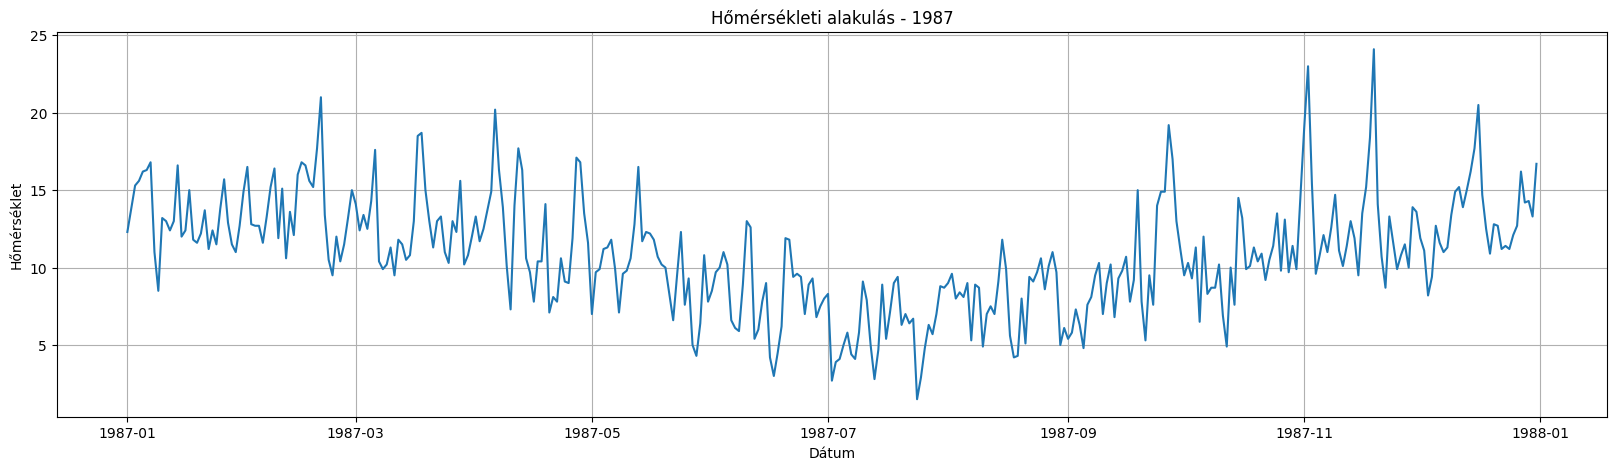

<Axes: title={'center': 'Temp'}, xlabel='month'>

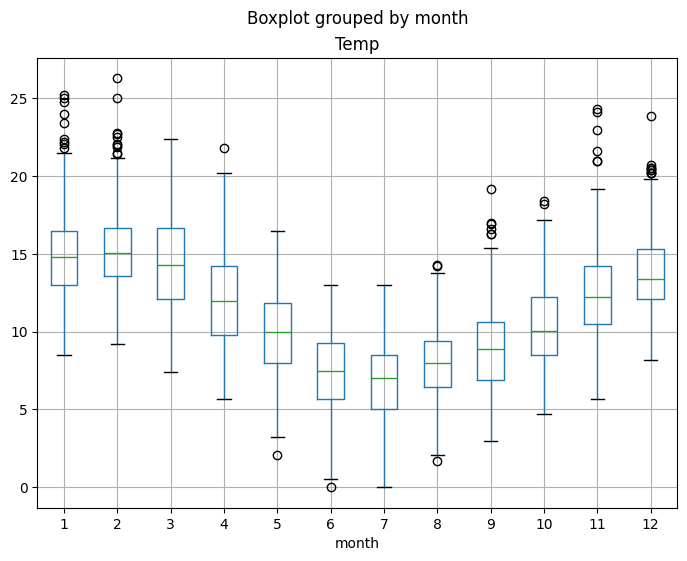

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Grouper

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df_temp = pd.read_csv(url)
df_temp.Date = pd.to_datetime(df_temp.Date)
df_temp.set_index('Date', inplace=True)

print(df_temp.describe())
print(df_temp.head())

df_1987 = df_temp.loc['1987']
plt.figure(figsize=(20, 5))
plt.plot(df_1987.index, df_1987['Temp'])
plt.title('Hőmérsékleti alakulás - 1987')
plt.xlabel('Dátum')
plt.ylabel('Hőmérséklet')
plt.grid(True)
plt.show()


df_temp['month'] = df_temp.index.month
df_temp.boxplot(column='Temp', by='month')



### 2. Feladat: Trend és szezonális komponens szétválasztása (decomposition)
Dataset: shampoo.csv

Feladat:
- Töltsd be az adatot (Month legyen index, PeriodIndex ha szükséges).
- Használd a seasonal_decompose() függvényt multiplicative és additive modellel is.
- Ábrázold külön az eredeti, a trend, a szezonális és a reziduális komponenseket.
- Melyik modell (additív vagy multiplikatív) illik jobban az adatra?

  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3
            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3


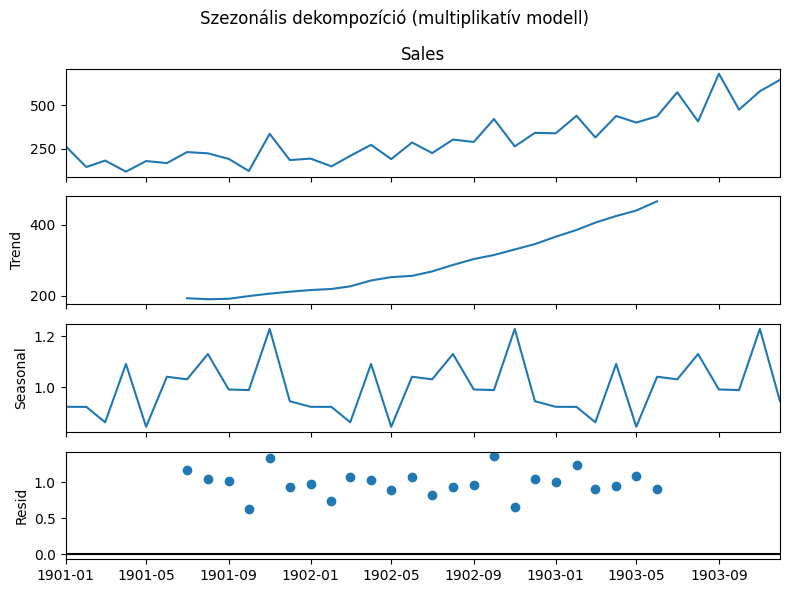

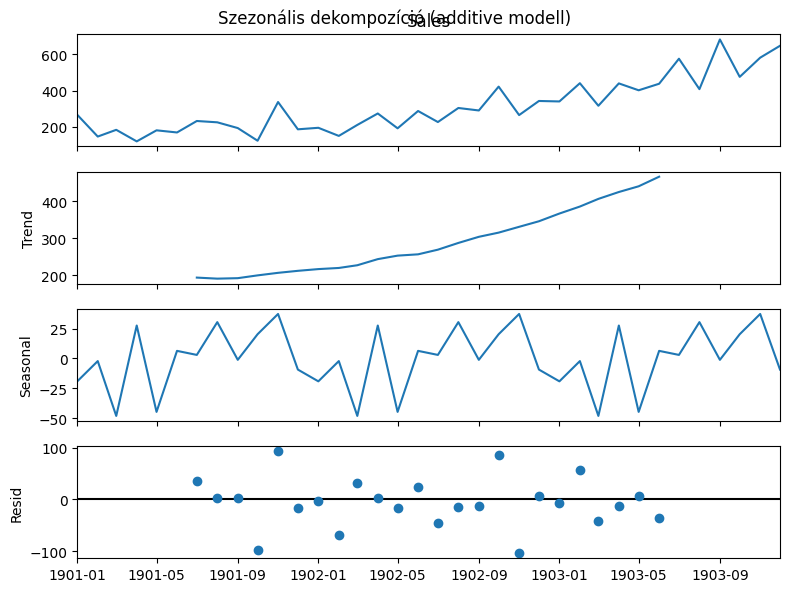

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv"
df_shampoo = pd.read_csv(url)
print(df_shampoo.head())
df_shampoo['Month'] = '190' + df_shampoo['Month']
df_shampoo['Month'] = pd.to_datetime(df_shampoo['Month'], format='%Y-%m')
df_shampoo.set_index('Month', inplace=True)
#df_shampoo.index = pd.PeriodIndex(df_shampoo.index, freq='M')

print(df_shampoo.head())

result_multi = seasonal_decompose(df_shampoo['Sales'], model='multiplicative', period=12)
result_addative = seasonal_decompose(df_shampoo['Sales'], model='additive', period=12)

plt.rcParams.update({'figure.figsize': (8, 6)})
result_multi.plot()
plt.suptitle("Szezonális dekompozíció (multiplikatív modell)")
plt.tight_layout()
plt.show()

result_addative.plot()
plt.suptitle("Szezonális dekompozíció (additive modell)")
plt.show()

### 3. Feladat: Hőtérkép és szezonális mintázat évenként
Dataset: daily-min-temperatures.csv

Feladat:
- Csoportosítsd az adatokat évenként és havonta.
- Készíts egy DataFrame-et, ahol:
  - Oszlopok: hónapok (1–12)
  - Sorok: évek (1981–1990)
- Ábrázold a hőtérképet (matshow vagy seaborn.heatmap) a minimum hőmérsékletekkel.
- Mely hónapokban van a legnagyobb különbség az évek között?

<Figure size 1000x600 with 0 Axes>

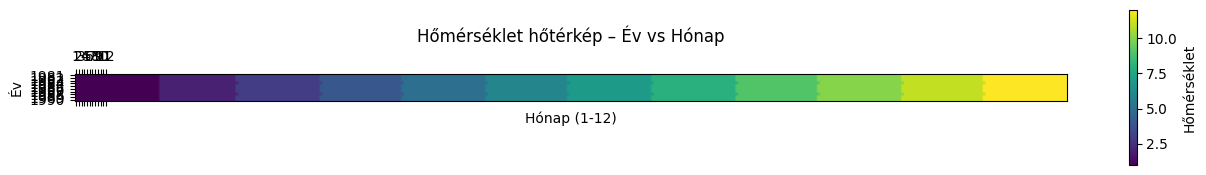

In [122]:
import seaborn as sns


groups = df_temp.groupby(Grouper(freq='YE'))


years = DataFrame()
for name, group in groups:
    years[name.year] = group['month'].values


plt.figure(figsize=(10, 6))
plt.matshow(years.T, interpolation=None)
plt.title("Hőmérséklet hőtérkép – Év vs Hónap")
plt.xlabel("Hónap (1-12)")
plt.ylabel("Év")
plt.xticks(ticks=range(12), labels=range(1, 13))
plt.yticks(ticks=range(len(years.columns)), labels=years.columns)
plt.colorbar(label="Hőmérséklet")
plt.show()

### 4. Feladat: Kétváltozós KDE (bivariate) vizsgálat
Dataset: shampoo.csv

Feladat:
- Hozz létre Month és Sales oszlopokat (ha nem különíti el).
- Standardizáld az eladásokat évenként (z-score).
- Készíts bivariate KDE plotot Month vs Standardized Sales tengelyekkel (Seaborn kdeplot()).
- Értelmezd, melyik hónapban volt eltérés az éves átlaghoz képest!

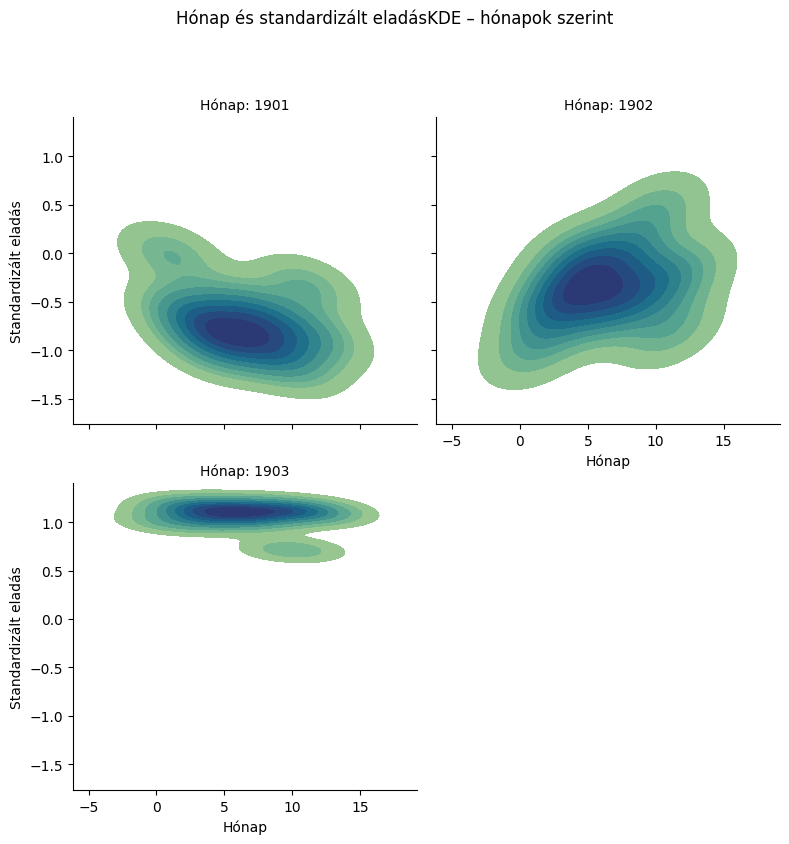

In [123]:

df_shampoo['Month_num'] = df_shampoo.index.month
df_shampoo['Year'] = df_shampoo.index.year

df_shampoo['Sales_std'] = df_shampoo.groupby('Month_num')['Sales'].transform(
    lambda x: (x - x.mean()) / x.std()
)

g = sns.FacetGrid(df_shampoo, col="Year", col_wrap=2, height=4)
g.map_dataframe(
    sns.kdeplot,
    x="Month_num",
    y="Sales_std",
    fill=True,
    cmap="crest",
    thresh=0.05
)
g.set_titles("Hónap: {col_name}")
g.set_axis_labels("Hónap", "Standardizált eladás")
plt.suptitle("Hónap és standardizált eladásKDE – hónapok szerint", y=1.05)
plt.tight_layout()
plt.show()